<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Income, Funding & SAT / ACT Scores

## Problem Statement

This project aims to identify the districts in California that have the worst overall student performance on the SAT and ACT tests, and identify possible reasons for the performance gap between these districts and the best performing districts. It also aims to identify potential reasons for poor participation rate in the SAT and ACT. This will allow the state of California to recommend programs to increase test performance and test participation rates, and in doing so, hopefully enable more students to go to college.

### Contents:
- [Background](#Background)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from students' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

Prior research seems to show that household income is a major predictor of SAT and ACT scores, with richer students outperforming poorer students.<sup>[1]</sup> Two decades ago, criticisms that tests contain cultural biases (such as the use of "regatta" in a vocabulary tests, which critics argued was a word more likely to be known by privileged students) eventually led to the University of California system successfully lobbying for changes that would remove cultural biases from the test.<sup>[2]</sup> However, performance gaps between higher and lower income groups continue to persist.

Reasons often cited for the divide between rich and poor students include ability to pay for private test prep courses, and the fact that students living in wealthier districts typically attend better-funded schools.<sup>[3]</sup> However, research seems to indicate that private test prep has limited effect on test grades.<sup>[4]</sup> This project thus uses an external dataset to explore how school funding and income may influence SAT and ACT scores, so as to inform resource-allocation by the state of California.

<br>

<sup>[1]</sup> Mark Kantrowitz (2021). *[How Admissions Tests Discriminate Against Low-Income And Minority Student Admissions At Selective Colleges](https://www.forbes.com/sites/markkantrowitz/2021/05/21/how-admissions-tests-discriminate-against-low-income-and-minority-student-admissions-at-selective-colleges/?sh=263a4f0e3cc1)*. Forbes. Retrieved 5 October 2021.

<sup>[2][4]</sup> Josh Zunbrun (2014). *[SAT Scores and Income Inequality: How Wealthier Kids Rank Higher](https://www.wsj.com/articles/BL-REB-28270)*. Wall Street Journal. Retrieved 5 October 2021.


<sup>[3]</sup> Abigail Johnson Hess (2019) *[Rich students get better SAT scores — here’s why](https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html)*. CNBC. Retrieved 5 October 2021.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Data Cleaning
#### Cleaning California ACT Scores

In [35]:
#Import California ACT scores with renamed columns
act_col_names = ["cds", 
                 "county_code",
                 "district_code",
                 "school_code",
                 "row_type",
                 "school_name",
                 "district_name",
                 "county_name",
                 "enrolled_students_act",
                 "num_test_takers_act",
                 "ave_read",
                 "ave_eng",
                 "ave_math",
                 "ave_sci",
                 "num_above_21",
                 "pct_above_21",
                 "year",
                 "unnamed"]

act = pd.read_csv("../data/act_2019_ca.csv", header=0, names = act_col_names)

#Print first five rows of ACT scores dataframe
act.head()

,cds,county_code,district_code,school_code,row_type,school_name,district_name,county_name,enrolled_students_act,num_test_takers_act,ave_read,ave_eng,ave_math,ave_sci,num_above_21,pct_above_21,year,unnamed
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


##### Checking data types

In [36]:
act.dtypes

cds                      float64
county_code              float64
district_code            float64
school_code              float64
row_type                  object
school_name               object
district_name             object
county_name               object
enrolled_students_act    float64
num_test_takers_act      float64
ave_read                  object
ave_eng                   object
ave_math                  object
ave_sci                   object
num_above_21              object
pct_above_21              object
year                      object
unnamed                  float64
dtype: object

As seen above, columns relating to the scores are objects when they should be floats. This is because score data has been keyed as * for schools with less than 15 test takers, which accounts for 532 rows.

In [37]:
act_convert_cols = ["ave_read", 
                    "ave_eng", 
                    "ave_math", 
                    "ave_sci", 
                    "num_above_21", 
                    "pct_above_21"]

#Convert "*" values into null values
act[act_convert_cols] = act[act_convert_cols].replace("*", np.nan)

#Convert average score values and number / percentage of students with 21 and above to floats
act[act_convert_cols] = act[act_convert_cols].astype(float, errors = "ignore")

##### Check missing values

In [38]:
act.isnull().sum()

cds                         1
county_code                 1
district_code               1
school_code               523
row_type                    1
school_name               581
district_name              59
county_name                 1
enrolled_students_act       1
num_test_takers_act         1
ave_read                  889
ave_eng                   889
ave_math                  889
ave_sci                   889
num_above_21              889
pct_above_21              889
year                        1
unnamed                  2310
dtype: int64

As seen in the code blocks below:

- There is 1 missing value for all columns because the last row is empty.
- The last columns (unnamed) is empty.
- There are 889 missing values for all the score columns because there were 15 test takers in 888 schools -- the 889th missing value is due to the 1 empty row.
- There are 58 rows that aggregate the scores for the 58 counties and 522 rows that aggregate the scores for 522 school districts -- this accounts for the missing 523 and 581 school codes and names, and the missing 59 district names

In [39]:
#2309 is an empty row
act.loc[act["cds"].isnull(),:]

,cds,county_code,district_code,school_code,row_type,school_name,district_name,county_name,enrolled_students_act,num_test_takers_act,ave_read,ave_eng,ave_math,ave_sci,num_above_21,pct_above_21,year,unnamed
2309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Score values are not recorded for schools with less than 15 test takers
act.loc[act["ave_read"].isnull(),:].sort_values("num_test_takers_act")

,cds,county_code,district_code,school_code,row_type,school_name,district_name,county_name,enrolled_students_act,num_test_takers_act,ave_read,ave_eng,ave_math,ave_sci,num_above_21,pct_above_21,year,unnamed
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1187,1.062539e+13,10.0,1062539.0,NaN,D,NaN,West Park Elementary,Fresno,69.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1184,1.062380e+13,10.0,1062380.0,NaN,D,NaN,Raisin City Elementary,Fresno,39.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1170,9.618380e+12,9.0,961838.0,NaN,D,NaN,Buckeye Union Elementary,El Dorado,25.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1167,8.100820e+12,8.0,810082.0,NaN,D,NaN,Del Norte County Office of Education,Del Norte,117.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,5.410546e+13,54.0,5410546.0,NaN,D,NaN,Tulare County Office of Education,Tulare,465.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
12,1.964733e+13,19.0,1964733.0,126623.0,S,Academy of Medical Arts at Carson High,Los Angeles Unified,Los Angeles,126.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
522,3.375176e+13,33.0,3375176.0,3332350.0,S,Elsinore High,Lake Elsinore Unified,Riverside,437.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
920,1.764022e+13,17.0,1764022.0,1735000.0,S,Lower Lake High,Konocti Unified,Lake,121.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN


In [41]:
#Rows that aggregate scores for counties have null values for school_name and district_name
act.loc[(act["row_type"]=="C"),:].head()

,cds,county_code,district_code,school_code,row_type,school_name,district_name,county_name,enrolled_students_act,num_test_takers_act,ave_read,ave_eng,ave_math,ave_sci,num_above_21,pct_above_21,year,unnamed
1064,3.400000e+13,34.0,0.0,0.0,C,NaN,NaN,Sacramento,19540.0,3065.0,21.0,20.0,21.0,21.0,1526.0,49.79,2018-19,NaN
1065,3.900000e+13,39.0,0.0,0.0,C,NaN,NaN,San Joaquin,11778.0,1348.0,22.0,21.0,21.0,21.0,693.0,51.41,2018-19,NaN
1066,1.500000e+13,15.0,0.0,0.0,C,NaN,NaN,Kern,14229.0,1257.0,21.0,20.0,20.0,20.0,544.0,43.28,2018-19,NaN
1067,4.500000e+13,45.0,0.0,0.0,C,NaN,NaN,Shasta,2161.0,173.0,26.0,24.0,24.0,24.0,131.0,75.72,2018-19,NaN
1068,5.100000e+13,51.0,0.0,0.0,C,NaN,NaN,Sutter,1827.0,196.0,23.0,22.0,22.0,22.0,117.0,59.69,2018-19,NaN


In [42]:
#Remove empty row
act.drop(2309, inplace = True)

#Remove empty column
act.drop("unnamed", axis=1, inplace = True)

##### Adding columns

I want to investigate if income and expenditures may also affect participation rate. I will create a participation rate column but want to exclude data points from my analysis if the number of enrolled students is less than 15. This is because if the number enrolled is small, small variations in number of test-takers can lead to wide changes in participation rate (e.g. 0 test takers out of 1 enrolled is 0% but 1 test taker out of 1 enrolled is 100%).

In [43]:
#Creating a participation rate column, returning null values if number enrolled is less than 30
act["participation_act"] = np.where(act["enrolled_students_act"]>= 30, act["num_test_takers_act"] / act["enrolled_students_act"], np.nan)

In [44]:
#Check min and max values comply with min and max possible values - participation is weird
act.describe()

,cds,county_code,district_code,school_code,enrolled_students_act,num_test_takers_act,ave_read,ave_eng,ave_math,ave_sci,num_above_21,pct_above_21,participation_act
count,2.309000e+03,2309.000000,2.309000e+03,1.787000e+03,2309.000000,2309.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,2100.000000
mean,2.929718e+13,28.666522,2.855616e+06,1.902681e+06,828.172802,143.182763,22.075299,21.204082,21.416608,21.356791,126.960591,52.618994,0.178038
std,1.444996e+13,14.425498,1.492574e+06,1.838954e+06,10667.048988,1816.545548,3.673367,4.045587,3.380492,3.210470,1261.360177,25.580458,0.210239
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,12.000000,10.000000,14.000000,12.000000,0.000000,0.000000,0.000000
25%,1.964725e+13,19.000000,1.964519e+06,1.254385e+05,78.000000,3.000000,19.000000,18.000000,19.000000,19.000000,14.000000,31.130000,0.048942
50%,3.066647e+13,30.000000,3.066548e+06,1.930288e+06,218.000000,30.000000,22.000000,21.000000,21.000000,21.000000,29.000000,54.170000,0.123571
75%,3.868478e+13,38.000000,3.777032e+06,3.435674e+06,497.000000,86.000000,25.000000,24.000000,24.000000,24.000000,77.000000,74.740000,0.226565
max,5.872770e+13,58.000000,5.872769e+06,6.120893e+06,489650.000000,82668.000000,32.000000,32.000000,32.000000,31.000000,45466.000000,100.000000,2.323077


As seen above, there are districts with more test takers than enrolled students. Those should be deleted.

In [45]:
#Dropping rows with enrollment rate exceeding 1
act.drop(act.index[act["participation_act"]>1], inplace = True)

#### Cleaning California SAT Scores Data

This dataset has score data for both 12 graders and 11 graders. I will drop the columns for 11 graders as there is only data for 12 graders in the ACT dataset and there are too many columns in the SAT dataset. I will also drop the unnamed column which is an empty column like in the ACT score dataset.

In [46]:
#Import California SAT Scores
sat_col_names = ["cds", 
                 "county_code",
                 "district_code",
                 "school_code",
                 "row_type",
                 "school_name",
                 "district_name",
                 "county_name",
                 "enrolled_students_sat",
                 "num_test_takers_sat",
                 "num_erw_above_bench",
                 "pct_erw_above_bench",
                 "num_math_above_bench",
                 "pct_math_above_bench",
                 "enrolled_students_11",
                 "num_test_takers_11",
                 "num_erw_above_bench_11",
                 "pct_erw_above_bench_11",
                 "num_math_above_bench_11",
                 "pct_math_above_bench_11",
                 "num_both_above_bench",
                 "pct_both_above_bench",
                 "num_both_above_bench_11",
                 "pct_both_above_bench_11",
                 "year",
                 "unnamed"]

sat = pd.read_csv("../data/sat_2019_ca.csv", header = 0, names = sat_col_names)

#Drop columns for 11 graders
sat_cols_to_drop = ["enrolled_students_11",
                    "num_test_takers_11",
                    "num_erw_above_bench_11",
                    "pct_erw_above_bench_11",
                    "num_math_above_bench_11",
                    "pct_math_above_bench_11",
                    "num_both_above_bench_11",
                    "pct_both_above_bench_11",
                    "unnamed"]

sat.drop(sat_cols_to_drop, axis = 1, inplace = True)

#Print first five rows of dataframe
sat.head()

,cds,county_code,district_code,school_code,row_type,school_name,district_name,county_name,enrolled_students_sat,num_test_takers_sat,num_erw_above_bench,pct_erw_above_bench,num_math_above_bench,pct_math_above_bench,num_both_above_bench,pct_both_above_bench,year
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,*,*,*,*,*,*,2018-19
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,14,13.73,2018-19
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,18,15.93,2018-19
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,*,*,*,*,*,*,2018-19


Again, values for score columns are objects rather than floats. This is because values are keyed as * for schools with less than 15 test takers and values for those with 0 test takers are "nan".

In [47]:
sat.dtypes

cds                      float64
county_code              float64
district_code            float64
school_code              float64
row_type                  object
school_name               object
district_name             object
county_name               object
enrolled_students_sat    float64
num_test_takers_sat      float64
num_erw_above_bench       object
pct_erw_above_bench       object
num_math_above_bench      object
pct_math_above_bench      object
num_both_above_bench      object
pct_both_above_bench      object
year                      object
dtype: object

In [48]:
sat_convert_cols = ["num_erw_above_bench", 
                    "pct_erw_above_bench",
                    "num_math_above_bench", 
                    "pct_math_above_bench", 
                    "num_both_above_bench", 
                    "pct_both_above_bench"]

#Convert "*" and "nan" values into null values
sat[sat_convert_cols] = sat[sat_convert_cols].replace("*", np.nan)
sat[sat_convert_cols] = sat[sat_convert_cols].replace("nan", np.nan)

#Convert score values to floats
sat[sat_convert_cols] = sat[sat_convert_cols].astype(float, errors = "ignore")

Like the ACT dataset, the missing school and district name values are due to aggregate rows for counties and districts. missing values for score columns are due to values being omitted for schools with less than 15 test takers.

In [49]:
#Remove empty row
sat.drop(2579, inplace = True)

#Check for missing values
sat.isnull().sum()

cds                        0
county_code                0
district_code              0
school_code                0
row_type                   0
school_name              597
district_name             58
county_name                0
enrolled_students_sat      0
num_test_takers_sat        0
num_erw_above_bench      857
pct_erw_above_bench      857
num_math_above_bench     857
pct_math_above_bench     857
num_both_above_bench     857
pct_both_above_bench     857
year                       0
dtype: int64

In [50]:
#Creating a participation rate column, returning null values if number enrolled is less than 30
sat["participation_sat"] = np.where(sat["enrolled_students_sat"]>= 30, sat["num_test_takers_sat"] / sat["enrolled_students_sat"], np.nan)

There's are again rows where number of test takers exceed the number of enrolled students.

In [51]:
#Check min and max values comply with min and max possible values
sat.describe()

,cds,county_code,district_code,school_code,enrolled_students_sat,num_test_takers_sat,num_erw_above_bench,pct_erw_above_bench,num_math_above_bench,pct_math_above_bench,num_both_above_bench,pct_both_above_bench,participation_sat
count,2.579000e+03,2579.000000,2.579000e+03,2.579000e+03,2579.000000,2579.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,2226.000000
mean,2.915139e+13,28.519581,2.915138e+06,1.544913e+06,748.155487,264.274137,269.540070,68.318438,188.859466,45.783542,178.732288,43.371707,0.322313
std,1.428328e+13,14.258173,1.428327e+06,1.812049e+06,10095.758681,3568.205236,2956.948278,20.329336,2063.412843,22.877347,1951.895654,22.892739,0.222017
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.964725e+13,19.000000,1.964725e+06,1.025080e+05,63.000000,5.000000,33.000000,54.622500,17.000000,27.512500,16.000000,25.000000,0.182986
50%,3.066597e+13,30.000000,3.066597e+06,1.377860e+05,171.000000,55.000000,79.000000,71.810000,48.500000,45.040000,44.500000,42.330000,0.311661
75%,3.777103e+13,37.000000,3.777103e+06,3.037422e+06,462.000000,161.000000,161.000000,85.110000,117.750000,64.022500,113.000000,61.482500,0.419140
max,5.872770e+13,58.000000,5.872769e+06,6.120893e+06,489650.000000,170411.000000,116500.000000,100.000000,81551.000000,100.000000,77178.000000,100.000000,1.045455


In [52]:
#Dropping rows with enrollment rate exceeding 1
sat.drop(sat.index[sat["participation_sat"]>1], inplace = True)

#### Cleaning additional dataset on average household income by district

In [53]:
#Import dataset
income_cols = ["rank", "district_name", "equity_score", "expenditure_per_pupil", "income"]
district_income = pd.read_csv("../data/district_income.csv", header = 0, names = income_cols)

#Print first five rows
district_income.head()

,rank,district_name,equity_score,expenditure_per_pupil,income
0,1,Los Nietos School District,0.03,14525,63516
1,2,Gen Shafter Elementary School District,0.13,17245,49167
2,3,Browns Elementary School District,0.17,10664,83942
3,4,Pajaro Valley Unified School District,0.19,13924,66867
4,5,Bonita Unified School District,0.27,10602,84202


In [54]:
#Checking for null values and types -- all fine!
district_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   919 non-null    int64  
 1   district_name          919 non-null    object 
 2   equity_score           919 non-null    float64
 3   expenditure_per_pupil  919 non-null    int64  
 4   income                 919 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 36.0+ KB


Look at the min and maxes below, expenditure and income have max values that are more than 3SD from the mean.

In [55]:
#Checking min and max
district_income.describe()

,rank,equity_score,expenditure_per_pupil,income
count,919.000000,919.000000,919.000000,919.000000
mean,460.000000,42.541665,13238.808487,70375.121872
std,265.436747,48.826999,6347.429652,31653.293993
min,1.000000,0.030000,260.000000,18917.000000
25%,230.500000,15.560000,10790.000000,48136.000000
50%,460.000000,31.460000,12031.000000,63175.000000
75%,689.500000,50.140000,13641.000000,84978.500000
max,919.000000,453.310000,82571.000000,250000.000000


As there are a fair number of outliers for average household income, and the max value of USD 250,000 (approximately USD 20,000 a month) is within a possible range, I will not remove outliers for average household income.

<AxesSubplot:>

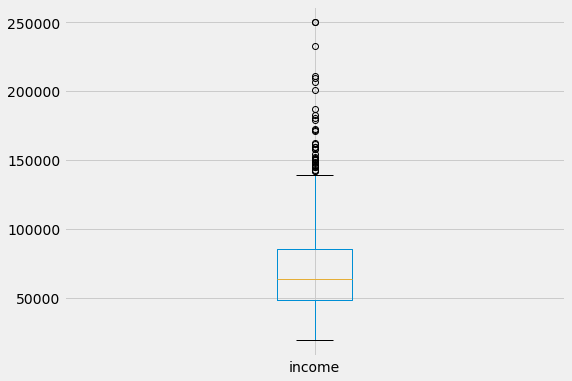

In [56]:
district_income.income.plot(kind = "box")

The expenditures have a number of points skewing very high. I've decided to remove 15 values which are above the mean + 3SD range (USD 32,270).

<AxesSubplot:>

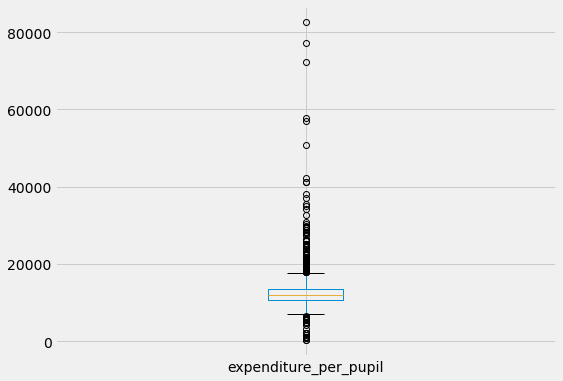

In [57]:
district_income.expenditure_per_pupil.plot(kind = "box")

In [58]:
expend_mean_3sd = district_income["expenditure_per_pupil"].mean() + (3*district_income["expenditure_per_pupil"].std())
income_rows_to_drop = district_income.index[district_income["expenditure_per_pupil"]> expend_mean_3sd]
district_income.drop(income_rows_to_drop, axis = 0, inplace = True)

In [59]:
district_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 915
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   904 non-null    int64  
 1   district_name          904 non-null    object 
 2   equity_score           904 non-null    float64
 3   expenditure_per_pupil  904 non-null    int64  
 4   income                 904 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 42.4+ KB


#### Merging datasets

I plan to merge on the district name so I need to make sure the district name is standardized across all the datasets. I checked the district names across the three datasets using ```np.unique(df["district_name"])```
- SAT and ACT datasets have same name formatting
- Income dataset includes "School District" at the end of each district name 
- Acronyms in income dataset are in title case (e.g. Abc Unified School District) while acronyms in SAT and ACT datasets are fully capitalized (e.g. ABC Unified)
- Inconsistent use of hyphenation (e.g. Brea-Olinda or Brea Olinda)

In [60]:
#I can't use unique or replace unless I turn the entire column into strings
district_income["district_name"] = district_income["district_name"].astype(str)
sat["district_name"] = sat["district_name"].astype(str)
act["district_name"] = act["district_name"].astype(str)

#Taking out the "School District" from the end of the district names in income dataset
district_income["district_name"] = district_income["district_name"].map(lambda cell: cell.replace(" School District",""))

#Standardizing title case and removing hyphens
district_income["district_name"] = district_income["district_name"].map(lambda cell: cell.replace("-"," ").title())
sat["district_name"] = sat["district_name"].map(lambda cell: cell.replace("-"," ").title())
act["district_name"] = act["district_name"].map(lambda cell: cell.replace("-"," ").title())

#When I converted the column to strings it turned null values into "Nan" so I'm changing them back
district_income["district_name"] = district_income["district_name"].replace("Nan", np.nan)
sat["district_name"] = sat["district_name"].replace("Nan", np.nan)
act["district_name"] = act["district_name"].replace("Nan", np.nan)

In [61]:
#Checking formatting of first 10 district name for SAT dataset
np.unique(sat["district_name"].astype(str))[0:10]

array(['Abc Unified', 'Acalanes Union High', 'Acton Agua Dulce Unified',
       'Adelanto Elementary', 'Alameda County Office Of Education',
       'Alameda Unified', 'Albany City Unified', 'Alhambra Unified',
       'Alpaugh Unified', 'Alvord Unified'], dtype=object)

In [62]:
#Checking formatting of first 10 district names formatting for ACT dataset
np.unique(act["district_name"].astype(str))[0:10]

array(['Abc Unified', 'Acalanes Union High', 'Acton Agua Dulce Unified',
       'Adelanto Elementary', 'Alameda County Office Of Education',
       'Alameda Unified', 'Albany City Unified', 'Alhambra Unified',
       'Alpaugh Unified', 'Alvord Unified'], dtype=object)

In [63]:
#Checking formatting of first 10 district names formatting for income dataset
np.unique(district_income["district_name"].astype(str))[0:10]

array(['Abc Unified', 'Acalanes Union High', 'Acton Agua Dulce Unified',
       'Adelanto Elementary', 'Alameda Unified', 'Albany City Unified',
       'Alexander Valley Union Elementary', 'Alhambra Unified',
       'Alisal Union', 'Allensworth Elementary'], dtype=object)

In [64]:
#Dropping redundant columns
act_sat_cols_to_drop = ["cds", 
                        "county_code", 
                        "district_code", 
                        "school_code",
                        "county_name",
                        "school_name",
                        "year"]
sat.drop(act_sat_cols_to_drop, axis = 1, inplace = True)
act.drop(act_sat_cols_to_drop, axis = 1, inplace = True)

In [65]:
#Extracting aggregated district data from SAT and ACT datasets
district_sat = sat.loc[sat["row_type"]=="D",:]
district_act = act.loc[act["row_type"]=="D",:]

#Merging datasets
all_scores_2_sets = pd.merge(district_income, district_sat, on = "district_name", how = "left")
all_scores = pd.merge(all_scores_2_sets, district_act, on = "district_name", how = "left")

all_scores.sort_values("district_name").head()

,rank,district_name,equity_score,expenditure_per_pupil,income,row_type_x,enrolled_students_sat,num_test_takers_sat,num_erw_above_bench,pct_erw_above_bench,...,row_type_y,enrolled_students_act,num_test_takers_act,ave_read,ave_eng,ave_math,ave_sci,num_above_21,pct_above_21,participation_act
83,84,Abc Unified,4.86,11434,76547,D,1663.0,631.0,521.0,82.57,...,D,1663.0,216.0,26.0,26.0,26.0,25.0,172.0,79.63,0.129886
830,825,Acalanes Union High,81.70,14295,122258,D,1408.0,473.0,452.0,95.56,...,D,1408.0,539.0,29.0,28.0,27.0,27.0,487.0,90.35,0.382812
481,479,Acton Agua Dulce Unified,33.07,3161,100676,D,1268.0,112.0,74.0,66.07,...,D,1268.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.008675
598,596,Adelanto Elementary,42.00,11686,49070,D,142.0,2.0,NaN,NaN,...,D,142.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.007042
267,268,Alameda Unified,17.93,10387,98150,D,919.0,373.0,291.0,78.02,...,D,919.0,155.0,27.0,26.0,26.0,25.0,134.0,86.45,0.168662


In [66]:
#I have too many columns so I'm going to drop more
more_cols_to_drop = ["rank",
                     "equity_score",
                     "row_type_x",
                     "row_type_y",
                     "enrolled_students_sat",
                     "num_test_takers_sat",
                     "enrolled_students_act",
                     "num_test_takers_act",
                     "num_above_21",
                     "num_erw_above_bench",
                     "num_math_above_bench",
                     "num_both_above_bench"]
all_scores.drop(more_cols_to_drop, axis = 1, inplace = True)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**district_name**|*object*|2019 Census|The name of the school district| 
|**expenditure_per_student**|*integer*|2019 Census|Public expenditure per student in the district| 
|**income**|*integer*|2019 Census|Average household income of students in the district| 
|**pct_erw_above_bench**|*float*|2019 Dept. of Edu.|Percent of students who scored above the mean for Reading & Writing| 
|**pct_math_above_bench**|*float*|2019 Dept. of Edu.|Percent of students who scored above the mean for Math| 
|**pct_both_above_bench**|*float*|2019 Dept. of Edu.|Percent of students who scored above the mean for combined score| 
|**participation_sat**|*float*|2019 Dept. of Edu.|Percent of enrolled seniors who took the SAT| 
|**ave_read**|*float*|2019 Dept. of Edu.|Average reading score for students in the district| 
|**ave_math**|*float*|2019 Dept. of Edu.|Average reading score for students in the district| 
|**ave_sci**|*float*|2019 Dept. of Edu.|Average reading score for students in the district| 
|**pct_above_21**|*float*|2019 Dept. of Edu.|Percent of students who scored above the benchmark composite score of 21| 
|**participation_act**|*float*|2019 Dept. of Edu.|Percentage of enrolled seniors who took the ACT|


## Exploratory Data Analysis
The poorest performing districts were William Unified, Golden Plains Unified, Firebaugh Las Deltas Unified and Cloverdale Unified, while the best performing ones were La Canada Unified, San Marino Unified, Palo Alto Unified, Irvine Unified, and South Pasadena Unified.

We can see that there is a wide income gap between the best performing and poorest performing districts. The best performing districts all had average household incomes above the 75th percentile of around USD 85,000. The poorest performing districts all had average household incomes below the mean of around USD 70,000.

In [67]:
#Print summary statistics
all_scores.describe()

,expenditure_per_pupil,income,pct_erw_above_bench,pct_math_above_bench,pct_both_above_bench,participation_sat,ave_read,ave_eng,ave_math,ave_sci,pct_above_21,participation_act
count,910.000000,910.000000,351.000000,351.000000,351.000000,392.000000,309.000000,309.000000,309.000000,309.000000,309.000000,391.000000
mean,12641.679121,70497.773626,72.597464,49.210313,46.821795,0.301480,22.527508,21.611650,21.731392,21.750809,55.392686,0.159484
std,3869.070795,31681.677676,16.107299,20.641646,20.804482,0.147006,3.357980,3.711774,3.202427,2.983620,24.034672,0.135566
min,260.000000,18917.000000,31.580000,0.000000,0.000000,0.000000,15.000000,14.000000,15.000000,15.000000,0.000000,0.000000
25%,10786.500000,48184.250000,61.260000,33.330000,30.975000,0.221598,20.000000,19.000000,19.000000,19.000000,35.280000,0.071297
50%,12012.000000,63364.000000,75.270000,48.940000,46.040000,0.294142,23.000000,21.000000,22.000000,22.000000,56.700000,0.126558
75%,13510.000000,85068.000000,85.880000,66.285000,63.815000,0.355693,25.000000,24.000000,24.000000,24.000000,76.000000,0.212769
max,30880.000000,250000.000000,100.000000,93.330000,91.760000,0.936210,30.000000,31.000000,31.000000,29.000000,100.000000,0.871132


In [68]:
#Showing the five poorest performing districts
all_scores.sort_values("pct_both_above_bench").head()

,district_name,expenditure_per_pupil,income,pct_erw_above_bench,pct_math_above_bench,pct_both_above_bench,participation_sat,ave_read,ave_eng,ave_math,ave_sci,pct_above_21,participation_act
294,Williams Unified,12251,62024,37.93,3.45,0.00,0.333333,NaN,NaN,NaN,NaN,NaN,0.057471
443,Golden Plains Unified,15323,38211,37.04,0.00,0.00,0.216000,15.0,14.0,15.0,15.0,0.00,0.152000
535,Firebaugh Las Deltas Unified,13865,41225,47.62,7.14,5.95,0.494118,16.0,15.0,16.0,17.0,9.68,0.182353
796,Mcfarland Unified,11191,35307,37.88,10.61,9.09,0.315789,18.0,16.0,19.0,17.0,25.00,0.076555
115,Cloverdale Unified,12660,68226,47.62,19.05,9.52,0.247059,NaN,NaN,NaN,NaN,NaN,0.058824


In [69]:
#Showing the five best performing districts
all_scores.sort_values("pct_both_above_bench", ascending = False).head()

,district_name,expenditure_per_pupil,income,pct_erw_above_bench,pct_math_above_bench,pct_both_above_bench,participation_sat,ave_read,ave_eng,ave_math,ave_sci,pct_above_21,participation_act
887,La Canada Unified,11594,178897,95.88,92.94,91.76,0.489914,29.0,29.0,29.0,28.0,94.20,0.397695
874,San Marino Unified,13803,154224,95.00,93.33,91.67,0.436364,28.0,29.0,29.0,27.0,90.53,0.345455
895,Palo Alto Unified,20962,151579,96.19,91.28,90.46,0.359804,29.0,29.0,28.0,28.0,86.56,0.445098
401,Irvine Unified,10962,101576,94.71,90.25,88.09,0.325627,28.0,29.0,29.0,28.0,91.92,0.305643
304,South Pasadena Unified,11002,96579,96.69,88.40,87.85,0.489189,28.0,27.0,27.0,27.0,83.87,0.251351


However, expenditure per student didn't seem to vary between the best performing and worst performing districts. There was no observable pattern.

In [70]:
#Showing the districts with the lowest expenditures
all_scores.sort_values("expenditure_per_pupil").head(10)

,district_name,expenditure_per_pupil,income,pct_erw_above_bench,pct_math_above_bench,pct_both_above_bench,participation_sat,ave_read,ave_eng,ave_math,ave_sci,pct_above_21,participation_act
729,Santa Cruz City High,260,101094,82.23,67.25,63.76,0.332947,24.0,23.0,23.0,22.0,63.28,0.205336
824,Gorman Elementary,453,82917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891,Ravendale Termo Elementary,809,28571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,Meridian Elementary,914,62083,NaN,NaN,NaN,0.099237,NaN,NaN,NaN,NaN,NaN,0.007634
888,Maricopa Unified,990,34375,NaN,NaN,NaN,0.039106,NaN,NaN,NaN,NaN,NaN,0.000000
846,Marcum Illinois Union Elementary,1014,63875,NaN,NaN,NaN,0.085714,NaN,NaN,NaN,NaN,NaN,0.042857
876,Winship Robbins,1048,48125,NaN,NaN,NaN,0.115385,NaN,NaN,NaN,NaN,NaN,0.115385
857,Spencer Valley Elementary,1139,60000,88.89,55.56,55.56,0.090301,NaN,NaN,NaN,NaN,NaN,0.010033
777,Blochman Union Elementary,1695,88750,NaN,NaN,NaN,0.084507,NaN,NaN,NaN,NaN,NaN,0.070423
758,Liberty Elementary,2034,89028,NaN,NaN,NaN,0.014286,NaN,NaN,NaN,NaN,NaN,0.057143


The schools with the least amount of funding also seem to have the lowest participation rates. Many of these districts do not have score data available because the number of test takers were less than 15.

In [71]:
#Showing the districts with zero participation rate
all_scores[["district_name", "expenditure_per_pupil", "income"]].loc[(all_scores["participation_act"]==0) | (all_scores["participation_sat"]==0),:].sort_values("income")

,district_name,expenditure_per_pupil,income
888,Maricopa Unified,990,34375
26,Klamath Trinity Joint Unified,19369,38828
692,West Park Elementary,11844,42500
641,El Tejon Unified,11846,45595
463,Fort Sage Unified,13201,48382
96,Guerneville Elementary,14622,58822
534,Big Oak Flat Groveland Unified,19742,61581
493,South Bay Union Elementary,10239,62508
182,Esparto Unified,12223,67477
144,Live Oak Elementary,11961,70498


Income also seems to have some effect on participation rates. The majority of districts with 0 participation rates for either the SAT or ACT have average household incomes of less than the mean (USD 70,250).

#### Correlation Matrix

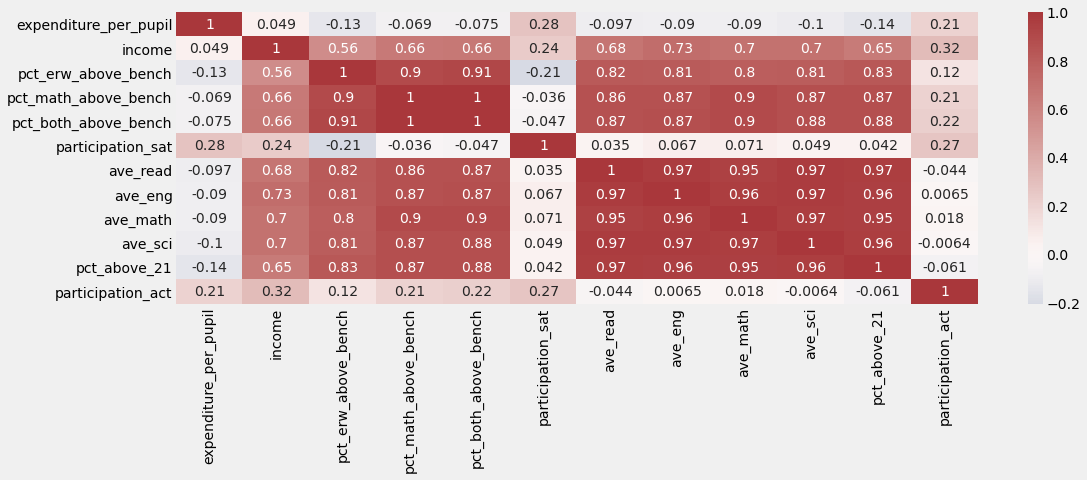

In [72]:
plt.figure(figsize=(16,5))
sns.heatmap(all_scores.corr(), annot = True, cmap = "vlag", center = 0);

In the heatmap above, positive correlations are marked in red while negative correlations are marked in blue. The intensity of the color conveys the strength of the correlation.

- The strongest correlations are between the score values, which indicates that districts with high SAT scores are likely to have high ACT scores as well.
- As expected, income has a large effect on both SAT and ACT scores. Since it has equal effect on composite scores for SAT and ACT, it doesn't appear that one test is more "equitable" than the other.
- Unexpectedly, expenditure seems to have small negative correlation with scores, such that scores DECREASE when expenditure increases. However, funding does appear to have moderate impact on test participation rates.
- Income also has a small to moderate effect on participation rates.
- Participation rates show little correlation with test performance.
- There is low correlation between expenditure per student and income, which seems to suggest that it is untrue that schools are better funded in districts with high average incomes.

#### Box-Plots

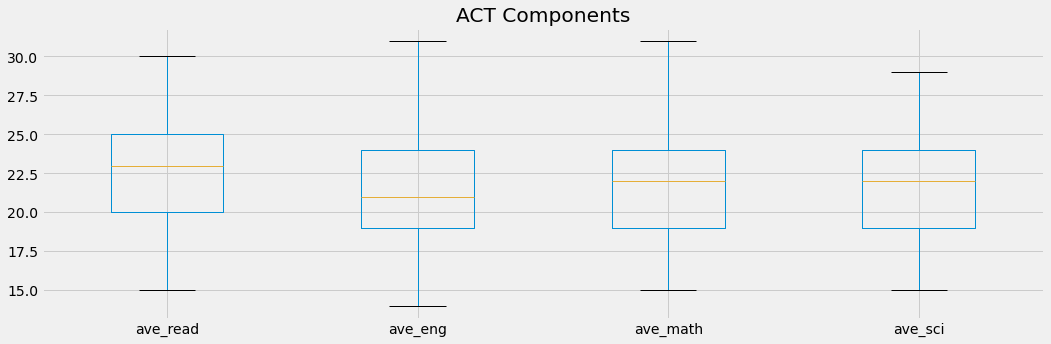

In [73]:
#Splitting the variables up into those of similar scale
box1 = ["ave_read",
        "ave_eng",
        "ave_math",
        "ave_sci"]

box2 = ["pct_erw_above_bench", 
        "pct_math_above_bench", 
        "pct_both_above_bench", 
        "pct_above_21",] 

box3 = ["participation_sat", 
        "participation_act"]

#Plotting boxplot for the ACT score components
all_scores[box1].plot(kind = "box", figsize = [16, 5], title = "ACT Components");

From the box plot we can see that the component scores are generally pretty consistent, with 50% of values falling around the 20 to 25 score range. Reading scores seems slightly higher on average than the others. English and Math scores tend to skew towards the lower ends.

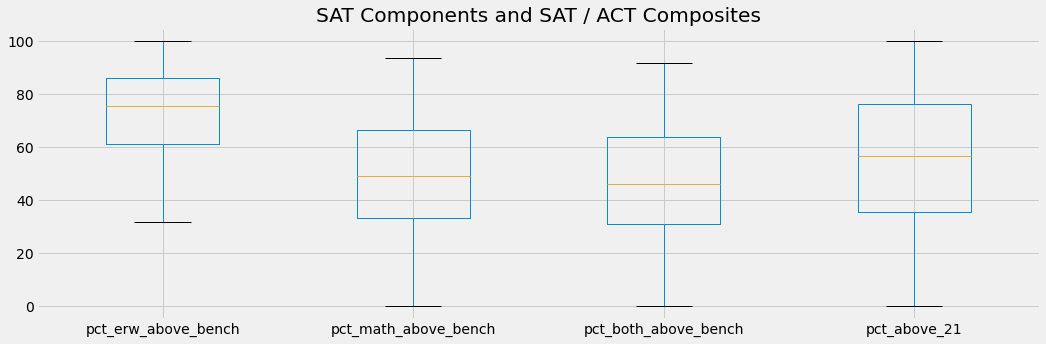

In [74]:
#Plotting boxplot for the SAT components and composite scores
all_scores[box2].plot(kind = "box", figsize = [16, 5], title = "SAT Components and SAT / ACT Composites");

Students in California generally seem to perform better on Evidence-Based Reading and Writing than Math. When comparing SAT and ACT composite scores, it appears that students perform better on the ACT than the SAT on average.

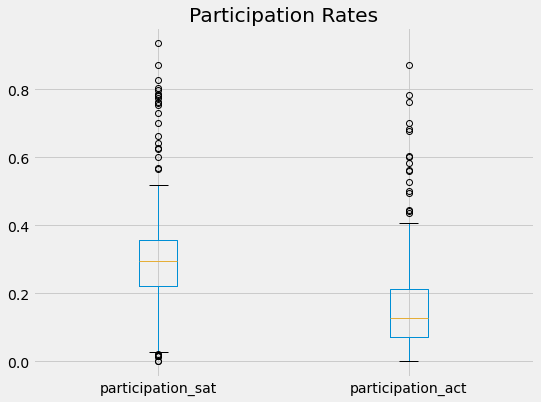

In [75]:
#Plotting boxplot for participation rate
all_scores[box3].plot(kind = "box", title = "Participation Rates");

Participation rates skew low. On overage, the SAT sees higher participation rates than the ACT. Both have points identified as outliers on the boxplot. (I decided not to remove the outliers because there are a fair number of them and they all fall within possible values.)

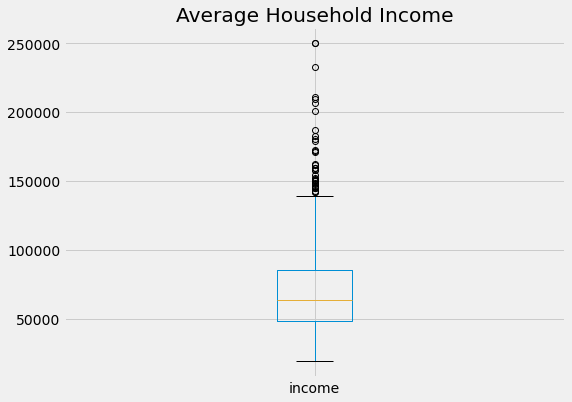

In [76]:
#Plotting boxplot for income
all_scores.income.plot(kind = "box", title = "Average Household Income");

Average household income skews low with a very long tail towards the higher values. (I decided not to remove the outliers because there are a fair number of them and they all fall within possible values.)

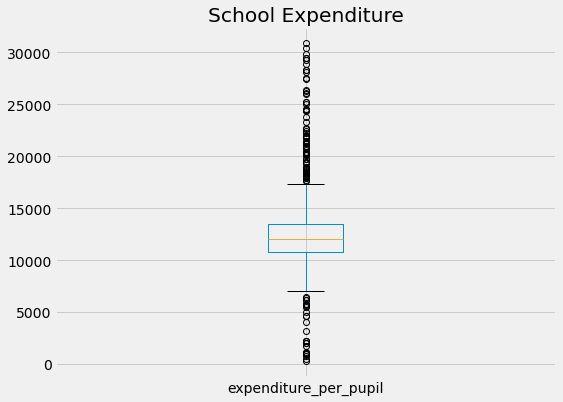

In [77]:
#Plotting boxplot for school expenditures
all_scores.expenditure_per_pupil.plot(kind = "box", title = "School Expenditure");

Average household income skews low with a long tail on either side. Previously, 15 outliers with values exceeding 3SD of the mean were removed.

#### Scatter Plots

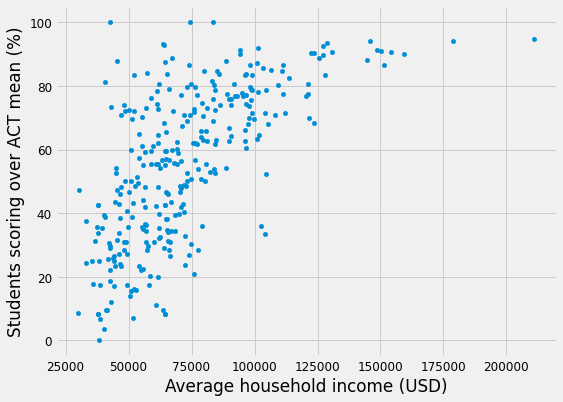

In [78]:
#Plotting ACT performance against average household income
all_scores.plot(x="income", 
                y="pct_above_21", 
                kind = "scatter", 
                xlabel = "Average household income (USD)", 
                ylabel = "Students scoring over ACT mean (%)", 
                fontsize = 12);

We can see a strong positive correlation between ACT scores and income.

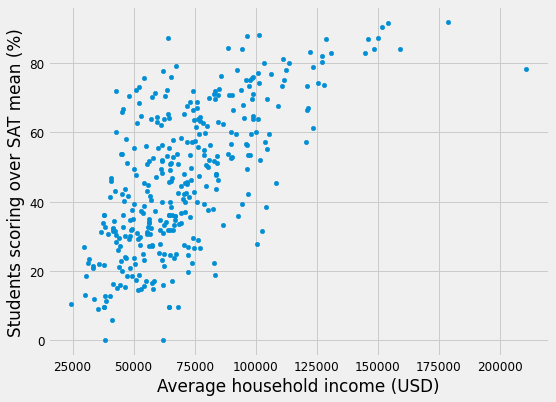

In [79]:
#Plotting SAT performance against average household income
all_scores.plot(x="income", 
                y="pct_both_above_bench", 
                kind = "scatter", 
                xlabel = "Average household income (USD)", 
                ylabel = "Students scoring over SAT mean (%)", 
                fontsize = 12);

We can see a strong positive relationship between SAT scores and income as well.

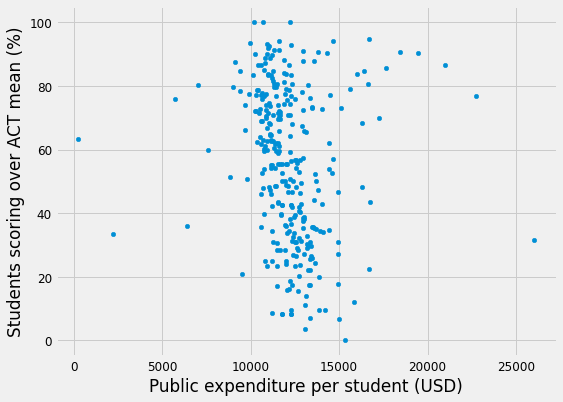

In [80]:
#Plotting ACT performance against district funding
all_scores.plot(x="expenditure_per_pupil", 
                y="pct_above_21", 
                kind = "scatter", 
                xlabel = "Public expenditure per student (USD)", 
                ylabel = "Students scoring over ACT mean (%)", 
                fontsize = 12);

District funding seemed to be negatively correlated with ACT performance. However, the overall correlation coefficient is low, even though the relationship between district funding and ACT performance appears to be strongest between USD 10,000 to 15,000 on the scatter plot.

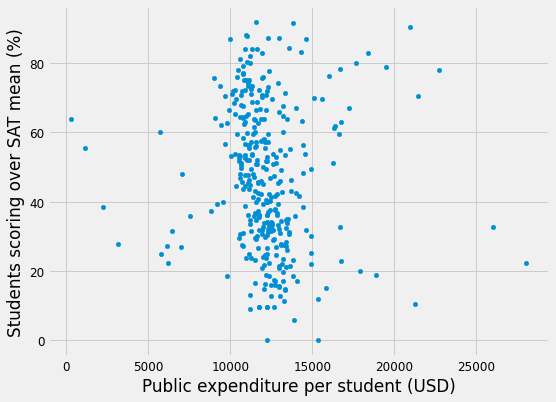

In [81]:
#Plotting SAT performance against district funding
all_scores.plot(x="expenditure_per_pupil", 
                y="pct_both_above_bench", 
                kind = "scatter", 
                xlabel = "Public expenditure per student (USD)", 
                ylabel = "Students scoring over SAT mean (%)", 
                fontsize = 12);

Likewise, district funding seemed to be negatively correlated with SAT performance as well. The relationship between district funding and SAT performance also appears to be strongest between USD 10,000 to 15,000 on the scatter plot as well, even though the correlation coefficient remains low.

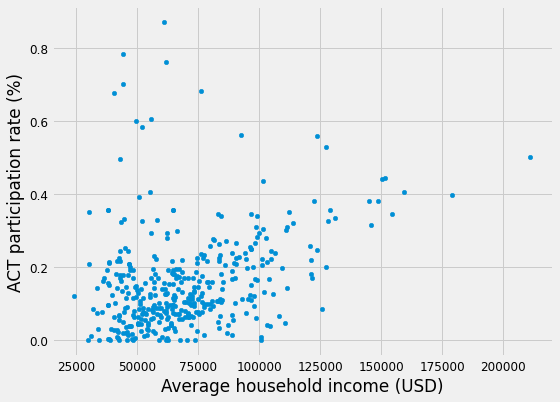

In [82]:
#Plotting ACT participation against average household income
all_scores.plot(x="income", 
                y="participation_act", 
                kind = "scatter", 
                xlabel = "Average household income (USD)", 
                ylabel = "ACT participation rate (%)", 
                fontsize = 12);

We see a small positive relationship between income and percentage of enrolled students taking the ACT.

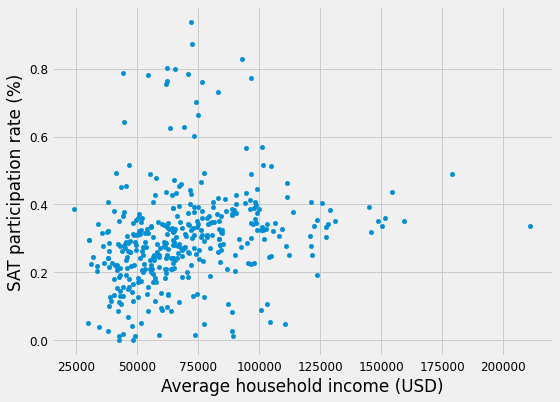

In [83]:
#Plotting SAT participation against average household income
all_scores.plot(x="income", 
                y="participation_sat", 
                kind = "scatter", 
                xlabel = "Average household income (USD)", 
                ylabel = "SAT participation rate (%)", 
                fontsize = 12);

We see a slightly stronger positive relationship between income and percentage of enrolled students taking the SAT.

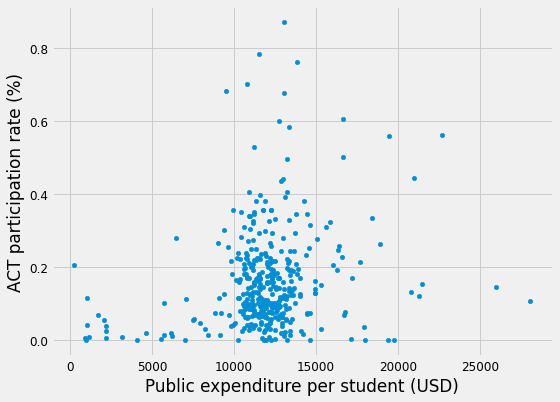

In [84]:
#Plotting ACT participation against district funding
all_scores.plot(x="expenditure_per_pupil", 
                y="participation_act", 
                kind = "scatter", 
                xlabel = "Public expenditure per student (USD)", 
                ylabel = "ACT participation rate (%)", 
                fontsize = 12);

There seems to be a small positive relationship between district funding and ACT participation rates.

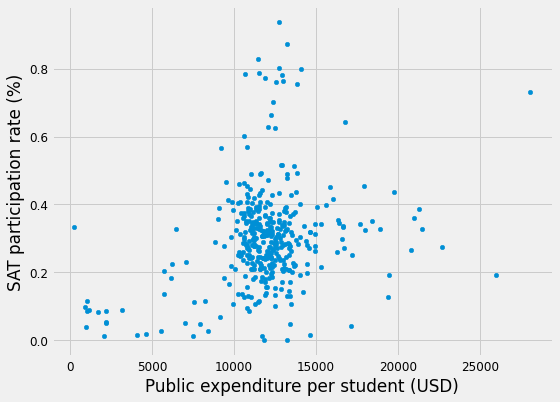

In [85]:
#Plotting SAT participation against district funding
all_scores.plot(x="expenditure_per_pupil", 
                y="participation_sat", 
                kind = "scatter", 
                xlabel = "Public expenditure per student (USD)", 
                ylabel = "SAT participation rate (%)", 
                fontsize = 12);

The positive relationship between district funding and participation rates is stronger for the SAT.

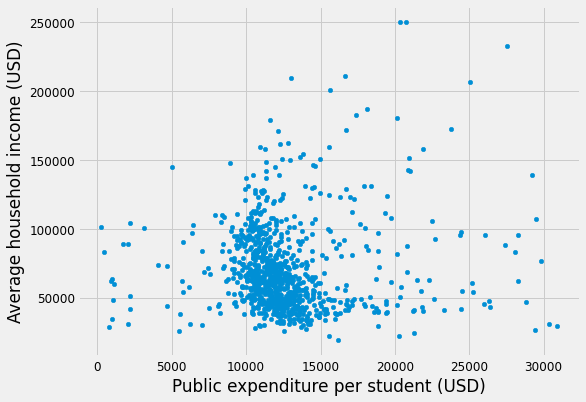

In [86]:
all_scores.plot(x="expenditure_per_pupil", 
                y="income", 
                kind = "scatter", 
                xlabel = "Public expenditure per student (USD)", 
                ylabel = "Average household income (USD)", 
                fontsize = 12);

There appears to be little correlation between average household income and district funding.

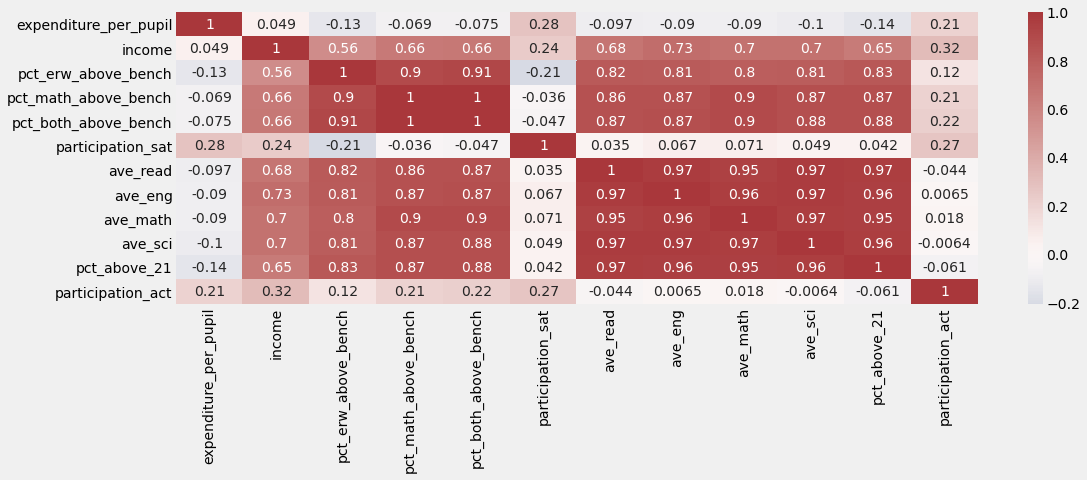

In [87]:
plt.figure(figsize=(16,5))
sns.heatmap(all_scores.corr(), annot = True, cmap = "vlag", center = 0);

## Conclusions and Recommendations
The aim was to investigate SAT and ACT score performance, with a specific focus on possible reasons for variation in score performance across various districts. In particular, our study focused on the impact of average household income and school district funding on score performance.

### Key Takeaways
1. **Districts with high SAT scores are extremely likely to have high ACT scores as well.**
2. **The strongest predictor of test performance was household income:** This held for both the SAT and ACT. It doesn't appear that one test is more "equitable" than the other.
2. **However, it's untrue that schools are better funded in districts with high average incomes:** There is little correlation between expenditure per student and income.
4. **In fact, districts that were better-funded performed more poorly:** Unexpectedly, test performance and expenditure per student was very weakly correlated, and the correlation was negative. This means that test scores *decrease* on average with increased funding.
    - <ins>This might suggest that funds are being poured into inefficient programs,</ins> and that funding must go into the *right* programs to achieve results.
    - <ins>An alternative explanation is that funding might be allocated based on the district's overall test performance,</ins> such that poorly-performing districts get more funding. Time series data would be needed to rule out or confirm this explanation, by investigating if sustained periods of increased funding improve test performances.
<br><br>
5. **Better test performance was not associated with better test participation rates:** If low participation rates is a concern, it must be addressed separately from test performance. Improving test performance will not necessarily increase participation rates.
6. **However, higher household income and district funding seemed to moderately increase test participation rates!**

### Recommendations
1. **Time series data should be collected to properly investigate the long-term effect of district funding on test performance:** Time series data would allow the state of California to ascertain if  funding truly translations into improvements in test scores, and to what extent. It would also allow us to estimate how much funding is needed, and how long it must be sustained to achieve improvements in overall test performance.

2. **Data should be collected to estimate the efficiency of ongoing or potential programs:** Investing wisely in evidence-based interventions is likely to achieve greater results than blindly spending on programs that show little effect. Data can be collected from schools in California, or by exploring the literature on evidence-based interventions being carried out outside of California.

3. **More research should be done to figure out exactly what explains the relationship between income and test performance:** Qualitative research such as observing the school and home environments of students in high-performing and poor-performing schools may enable us to better ascertain why income is such strong predictors of test performance.

4. **Increasing funding for a district might improve participation rates:** But low participation rates must be addressed separately from test performance, as the two are poorly correlated. HOWEVER...

5. **In the short-run, the heavy use of SAT and ACT scores in the college admission process will only reinforce income inequality:** Until more can be done to lessen the score gap between high and low income students, temporary measures should be established to enable poorer students to also enter universities. This could include:
    - <ins>Encouraging universities to adopt affirmative action policies based on family income,</ins> which would mean entry requirements are lower for students from low-income families.
    - <ins>Encouraging universities to adopt alternative ways of assessing candidates.</ins> An increasing number of universities are making submission of SAT or ACT scores optional. Candidates may instead be assessed based on testimonials or personal statements. However, it should be noted that such methods of assessing candidates may not necessarily be more equitable than admitting candidates based on SAT or ACT scores.